# Problem Set 5

See [Optimization](../scientific/optimization.ipynb), [Introduction](../pandas/intro.ipynb), and [Basic Functionality](../pandas/basics.ipynb)

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## Setup for Question 1-5

Load data from the [Basic Functionality](../pandas/basics.ipynb) lecture.

In [2]:
url = "state_unemployment.csv"
unemp_raw = pd.read_csv(url, parse_dates=["Date"])

And do the same manipulation as in the pandas basics lecture.

In [3]:
states = [
    "Arizona", "California", "Florida", "Illinois",
    "Michigan", "New York", "Texas"
]

unemp = (
    unemp_raw
    .reset_index()
    .pivot_table(index="Date", columns="state", values="UnemploymentRate")
    [states]
)

## Question 1

At each date, what is the minimum unemployment rate across all states
in our sample?

In [4]:
unemp.min(axis=1)

Date
2000-01-01    3.3
2000-02-01    3.2
2000-03-01    3.2
2000-04-01    3.3
2000-05-01    3.5
             ... 
2017-08-01    4.0
2017-09-01    3.9
2017-10-01    3.9
2017-11-01    3.9
2017-12-01    3.9
Length: 216, dtype: float64

What was the median unemployment rate in each state?

In [5]:
unemp.median()

state
Arizona       5.80
California    6.50
Florida       5.35
Illinois      6.15
Michigan      7.00
New York      5.70
Texas         5.40
dtype: float64

What was the maximum unemployment rate across the states in our
sample? In what state did it happen? In what month/year was this
achieved?

- Hint 1: What Python type (not `dtype`) is returned by a reduction?  
- Hint 2: Read documentation for the method `idxmax`.  

In [6]:
print(unemp.max().max())
print(unemp.max().idxmax())
print(unemp.max(axis=1).idxmax())

14.6
Michigan
2009-06-01 00:00:00


Classify each state as high or low volatility based on whether the
variance of their unemployment is above or below 4.

In [7]:
def high_or_low(s):
    """
    This function takes a pandas Series object and returns high
    if the var is above 4 and low if the var is below 6.5
    """
    if s.var() < 4:
        out = "Low"
    else:
        out = "High"

    return out

unemp.agg(high_or_low)

state
Arizona       High
California    High
Florida       High
Illinois       Low
Michigan      High
New York       Low
Texas          Low
dtype: object

## Question 2

Imagine that we want to determine whether unemployment was high (> 6.5),
medium (4.5 < x <= 6.5), or low (<= 4.5) for each state and each month.

Write a Python function that takes a single number as an input and
outputs a single string which notes whether that number is high, medium, or low.

In [8]:
def unemp_level(n):
    """
    This function takes a single number and returns high if the unemployment rate is above 6.5, 
    medium if it is above 4.5 but below 6.5,and low if it is below 4.5
    """
    if n <= 4.5:
        out = "Low"
    elif n > 4.5 and n <= 6.5:
        out = "Medium"
    else:
        out = "High"

    return out

Pass your function to either `apply` or `applymap` and save the
result in a new DataFrame called `unemp_bins`.

In [9]:
unemp_bins = unemp.applymap(unemp_level)

## Question 3

This exercise has multiple parts:

Use another transformation on `unemp_bins` to count how many
times each state had each of the three classifications.

- Hint 1: Will you need to use `apply` or `applymap` for transformation?  
- Hint 2: Try googling “pandas count unique value” or something similar to find the proper transformation.  

In [10]:
unemp_value_counts=unemp_bins.apply(pd.value_counts)
unemp_value_counts

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
High,75,106,68,91,142,65,51
Low,44,4,69,19,17,22,58
Medium,97,106,79,106,57,129,107


Construct a horizontal bar chart to detail the occurrences of each level.
Use one bar per state and classification for 21 total bars.

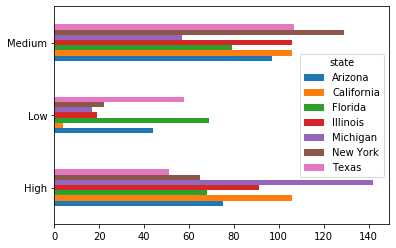

In [11]:
unemp_value_counts.plot(kind='barh');

## Question 4

Repeat Question 3, but count how many states had
each classification in each month. Which month had the most states
with high unemployment? What about medium and low?

Part 1: Write a Python function to classify unemployment levels

In [ ]:
# Your code here

Part 2: Decide whether you should use `.apply` or `.applymap`.

Part 3: Pass your function from part 1 to the method you determined in Part 2.

In [ ]:
unemp_bins = unemp#replace this comment with your code!!

Part 4: Count the number of times each state had each classification.

In [ ]:
## then make a horizontal bar chart here

Part 5: Apply the same transformation from Part 4 to each date instead of to each state.

In [12]:
unemp_value_counts=unemp_bins.apply(pd.value_counts,axis=1)
unemp_value_counts

,High,Low,Medium
Date,,,
2000-01-01,NaN,4.0,3.0
2000-02-01,NaN,4.0,3.0
2000-03-01,NaN,5.0,2.0
2000-04-01,NaN,5.0,2.0
2000-05-01,NaN,5.0,2.0
...,...,...,...
2017-08-01,NaN,2.0,5.0
2017-09-01,NaN,3.0,4.0
2017-10-01,NaN,3.0,4.0


In [13]:
unemp_value_counts.idxmax()

High     2009-04-01
Low      2000-08-01
Medium   2001-09-01
dtype: datetime64[ns]

## Question 5

For a single state of your choice, determine the mean
unemployment during “Low”, “Medium”, and “High” unemployment times.
(recall your `unemp_bins` DataFrame from the exercise above)

In [14]:
print(unemp.loc[unemp_bins['California']=='Low','California'].mean())
print(unemp.loc[unemp_bins['California']=='Medium','California'].mean())
print(unemp.loc[unemp_bins['California']=='High','California'].mean())

4.5
5.454716981132077
9.249056603773585


Which states in our sample performs the best during “bad times?” To
determine this, compute each state’s mean unemployment in
months where the mean unemployment rate is greater than 7.

In [15]:
unemp.loc[unemp.mean(axis=1)>7,:].mean().idxmin()

'Texas'